<a href="https://colab.research.google.com/github/basselkassem/addressing-hadron-collider-challenges-with-ML/blob/master/1_detecting_Z_boson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective

The objective of this work is to detect the appearance of the particle Z boson, determine its mass and reconstruct the parameters of its decay. This work consists of the following stages:
*  Problem describtion
*  Computing the invariant mass
*  Detecting the existance of Z boson
*  Using Bayesian optimization to determine the parameters of Z boson decay

# Description

**Large hadron collider (LHC)** is a particles accelator located 100 meters underground on the border of France and Switzerland. The particles (mainly protons) get accelorated in 27km long cirlce-shaped synchrotron accelorators. The collisions between the accelorated particles are examined by particle detectors. There is 4 different detecors in LHC: ATLAS, LHCb, ALICE and CMS.

**CMS detector** is responsible for detecting particles created by the collisions and measure different quantities from them.

Each second in LHC there is a 800 million proton collision.

When the protons collide, the collision energy can be transformed into mass $(E = m.c²)$. So it is possible that new particles are generated by the collisions. By examining those particles, researchers try to understand better for example: Dark matter, anti-matter, and the foundations of all matter.

## Detector Structure

CMS detector consists of 4 layers of sub-detectors. Each layer detects and measures different particles.
1.  **Silicon Tracker:** Reconstructs charged particles trajectories. Knowing the particle's track makes it  possible to compute the momenta and then compute the mass
2.  **Electomagnatic Calorimeter (ECal):** Measures the energy of the particles (mainly electorns and photons)
3.  **Hadron Calorimeter (HCal):** Measures the energy of the particles (hadrons like neutrons or protons)
4.  **Muon Chambrers:** Measures the momenta and energy of the muons

All layers contribute to each other to identify the type of particles and measure their quantum quntities. Machine learning can be used in all layers to enhance to identification quality (classification, clustering, ... etc)

## Indirect Detection of Z Boson

There is 800 million collision each second in LHC. It is not possible for the detectors to detect and measure all particles created by those collisions. Another problem is that Z Boson life-time is very short. This means that Z boson will decay before it even reaches to silicon tracker.

However, We still can deduce the existence of the Z boson indirectly. This can be done by detecting the particles originate from the decay itself.

Z boson can decay into 24 different ways, one way could be: Z boson can decay to muon $\mu^-$ and anti-muon $\mu^+$.

We still have a problem. Detecting the existance of muons and anti-muons is not sufficient evidence of the existance of Z boson.The detected two muons could originate from any different decays that happen in the collision event (there are many different processes going on the same time)


### Invariant Mass

*  We know the value of the Z boson mass reported by [Particle Data Group](https://pdg.lbl.gov/2020/listings/rpp2020-list-z-boson.pdf). **(Z boson Mass = 91.1876 [GeV])**

*  It is possible to compute the invariant mass of the pairs (muon, anti-muon) created by the collisions using the following:
$$
M = \sqrt{2p_{T1}p_{T2}( \cosh(\eta_1-\eta_2)-\cos(\phi_1-\phi_2) )}
$$
$p_T$ is the transverse momentum  of the muon. $\eta$ is the pseudorapidity (describes an angle). $\phi$ the azimuth angle.


If the invariant mass of the pair (muon, anti-muon) is equal to the Z boson mass, This indicates that this pair is originated from the decay of Z boson.**So the invariant mass can be used as an evidence about the existence of the Z boson.**

## Reconstructing Z Boson Decay Parameters

To model the decay of Z-boson, we will use Breit-Wigner distribution:
$$
 f(E) = \frac{k}{\left(E^2-M^2\right)^2+M^2\Gamma^2}
$$
$$
{\displaystyle k={\frac {2{\sqrt {2}}M\Gamma \gamma }{\pi {\sqrt {M^{2}+\gamma }}}}}~~~~with   {\displaystyle ~~~~\gamma ={\sqrt {M^{2}\left(M^{2}+\Gamma ^{2}\right)}}~}
$$

$$
f(E) = \frac{ \frac{2\sqrt{2}M\Gamma\sqrt{M^2(M^2+\Gamma^2)} }{\pi\sqrt{M^2+\sqrt{M^2(M^2+\Gamma^2)}}} }{(E^2-M^2)^2 + M^2\Gamma^2},
$$

 $E$ is the energy, $M$ is the mass of the particle that is detected, $\Gamma$ is the decay width.

To model the background mass distribution (background means the muon pairs that are originated from other decay processes different from Z boson), we will modify the above equation by adding linear component paramatized by $a$ and $b$:
$$
a.E+b+A.f(E)
$$

We will use Bayesian optimization to find the best parameteres ($a$, $b$, $A$, $\Gamma$) to fit Breit-Wigner distribution.

The decay width $\Gamma$ can be used to compute the Z boson lifetime $\tau$ using the following:
$$
\Gamma \equiv \frac{\hbar}{\tau},
$$
where $\hbar$ is the reduced Planck's constant.

## Data Description

*  **Run**: The run number of the event
*  **Event**: The event number(collision ID)
*  **pt**: The transverse of the momentum of the muon(GeV)
*  **eta**: The pseudorapidity of the muon (describes an angle)
*  **phi**: The azimuth angle
*  **Q**: The charge of the muon
*  **px, py, py**: different coordinates of momentum of the muon
*  **Type**: Type of the muon
*  **E**: Energy of the muon

# Download Data & Libs

In [2]:
!wget https://raw.githubusercontent.com/cms-opendata-education/zboson-exercise/master/DoubleMuRun2011A.csv

--2020-09-12 17:56:34--  https://raw.githubusercontent.com/cms-opendata-education/zboson-exercise/master/DoubleMuRun2011A.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72162209 (69M) [text/plain]
Saving to: ‘DoubleMuRun2011A.csv’

DoubleMuRun2011A.cs 100%[===================>]  68.82M  73.2MB/s    in 0.9s    

2020-09-12 17:56:35 (73.2 MB/s) - ‘DoubleMuRun2011A.csv’ saved [72162209/72162209]



In [3]:
!ls

DoubleMuRun2011A.csv  sample_data


# Import Libs

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from hyperopt import fmin, hp, STATUS_OK, tpe, Trials
from hyperopt.pyll import stochastic

%matplotlib inline
font = {'size'   : 16}
matplotlib.rc('font', **font)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Utile Funtions

In [43]:
def compute_histogram(data, bins_num):
  hist_values, bin_edges = np.histogram(data, bins = bins_num, density=False)
  bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
  return hist_values, bin_centers

def plot_hist(data, bins_num, title, x_label, y_label):
  hist_values, bin_centers = compute_histogram(data, bins_num)
  err = np.sqrt(hist_values)
  fig = plt.figure(figsize=(15, 8),)
  plt.errorbar(
      bin_centers, hist_values, yerr=err,  fmt='o', color='red', 
      ecolor='grey', capthick=0.5, zorder=1, label="data"
  )
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()

def breit_winger_dist(params, E):
  a, b, gamma, M, A = params['a'], params['b'], params['gamma'], params['M'], params['A']

  poly = a * E + b
  numerator_nume = 2 * np.sqrt(2) * M * gamma * np.sqrt(M**2 * (M**2 + gamma**2))
  numberator_deno = np.pi * np.sqrt(M**2 + np.sqrt(M**2 * (M**2 + gamma**2)))
  denominator = (E**2 - M**2)**2 + M**2 * gamma**2

  return poly + A*(numerator_nume/numberator_deno)/ denominator

def objective(params):
  y, X = compute_histogram(df.invariant_mass, 200)
  y_hat = breit_winger_dist(params, X)
  error = (y-y_hat)**2
  loss = np.sum(error)/len(error)
  return {'loss': loss, 'status': STATUS_OK, 'params': params}

# Read Data

In [6]:
df = pd.read_csv('DoubleMuRun2011A.csv')
df.head()

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.69873,-9.510430,0.366205,1.86329,9.51748,0.194546,3.10311,-1,G,9.76332,7.327710,-1.152370,6.34728,7.41776,0.775564,-0.155984,1,17.49220
1,165617,75100943,G,6.20385,-4.266610,0.456545,-4.47930,4.29097,-0.912070,3.03499,-1,G,9.66898,7.273970,-2.821120,-5.71040,7.80188,-0.678625,-0.369977,1,11.55340
2,165617,75587682,G,19.28920,-4.212080,-0.651623,18.81210,4.26219,2.190460,-2.98811,-1,G,9.82439,4.343940,-0.473505,8.79849,4.36967,1.449670,-0.108575,1,9.16361
3,165617,75660978,G,7.04268,-6.326780,-0.268545,3.08025,6.33248,0.469033,-3.09917,-1,G,5.58571,4.474760,0.848935,-3.23185,4.55458,-0.660499,0.187488,1,12.47740
4,165617,75947690,G,7.27507,0.102966,-5.533080,-4.72122,5.53403,-0.773616,-1.55219,-1,G,7.31811,-0.398831,6.940810,2.28247,6.95226,0.322677,1.628190,1,14.31590


In [7]:
print(df.shape)

(475465, 21)


# Explore the Data

## Unique values

In [8]:
for col in df.columns:
  tolal_sample_num = df.shape[0]
  col_unique_num = df[col].nunique()
  precentage = col_unique_num / tolal_sample_num * 100
  msg = col+'\t'+str(col_unique_num)+'\t'+str(tolal_sample_num)+'\t {:2f}%'.format(precentage)
  print(msg)

Run	34	475465	 0.007151%
Event	475357	475465	 99.977285%
Type1	1	475465	 0.000210%
E1	329072	475465	 69.210562%
px1	430499	475465	 90.542732%
py1	430501	475465	 90.543152%
pz1	415295	475465	 87.345020%
pt1	367814	475465	 77.358796%
eta1	345074	475465	 72.576110%
phi1	372439	475465	 78.331528%
Q1	2	475465	 0.000421%
Type2	2	475465	 0.000421%
E2	352036	475465	 74.040360%
px2	430900	475465	 90.627070%
py2	431381	475465	 90.728234%
pz2	430972	475465	 90.642213%
pt2	368604	475465	 77.524949%
eta2	414331	475465	 87.142271%
phi2	374205	475465	 78.702954%
Q2	2	475465	 0.000421%
M	323409	475465	 68.019518%


## Duplicates

In [9]:
df[df.duplicated(keep=False)]

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M


In [10]:
df = df.drop_duplicates(subset = 'Event')

## Boxplot

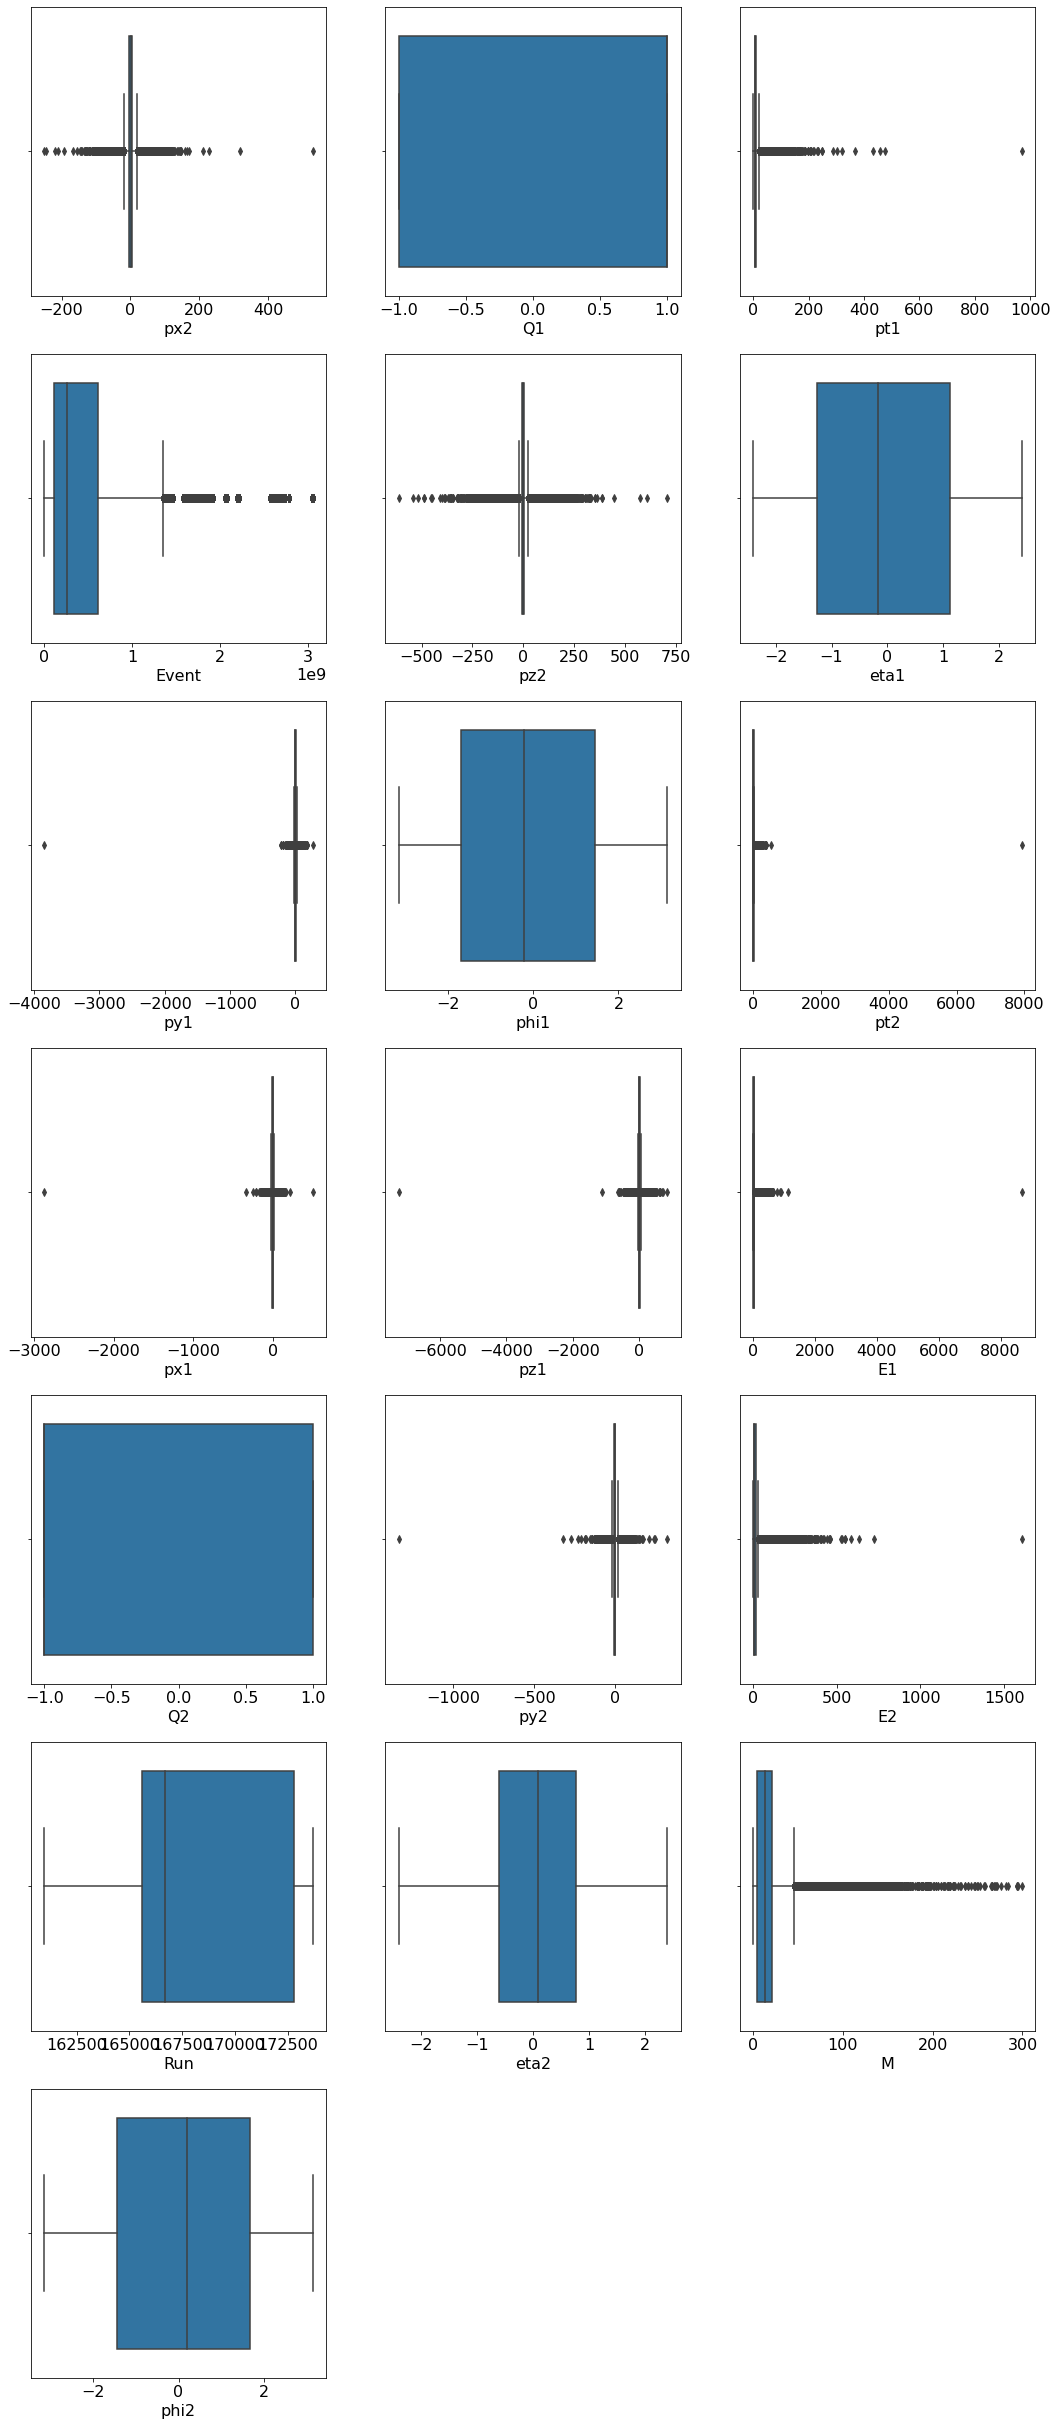

In [11]:
plt.figure(figsize = (18, 50))
cols=set(df.columns) - set(['Type1', 'Type2'])
for i, col in enumerate(cols):
  ax = plt.subplot(len(df.columns) // 3 + 1, 3, i + 1)
  sns.boxplot(df[col], ax = ax)

# Compute Invariant Mass

In [12]:
df['invariant_mass'] = np.sqrt(2*df.pt1*df.pt2*(np.cosh(df.eta1-df.eta2)-np.cos(df.phi1-df.phi2)))

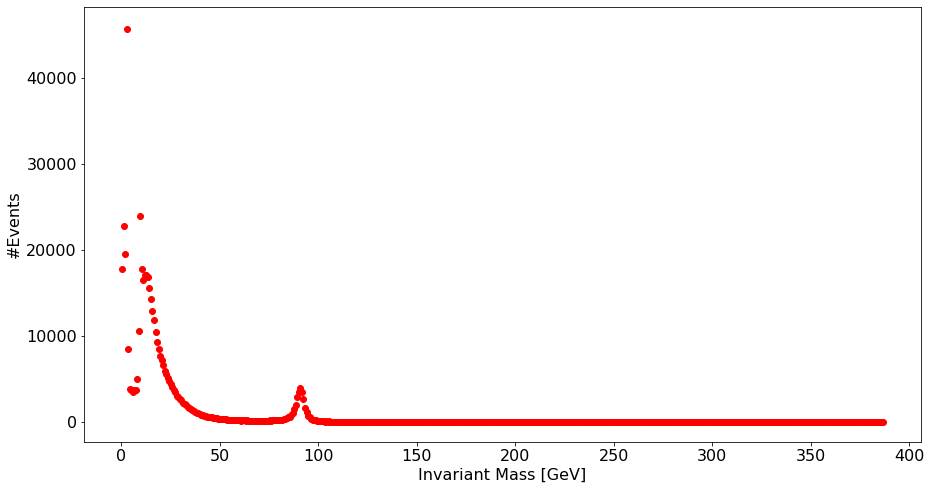

In [13]:
plot_hist(df['invariant_mass'], 500, '', 'Invariant Mass [GeV]', '#Events')

In [14]:
lower_limit = 70
upper_limit = 110
col = 'invariant_mass'
df = df[(df[col] > lower_limit) & (df[col] < upper_limit)]

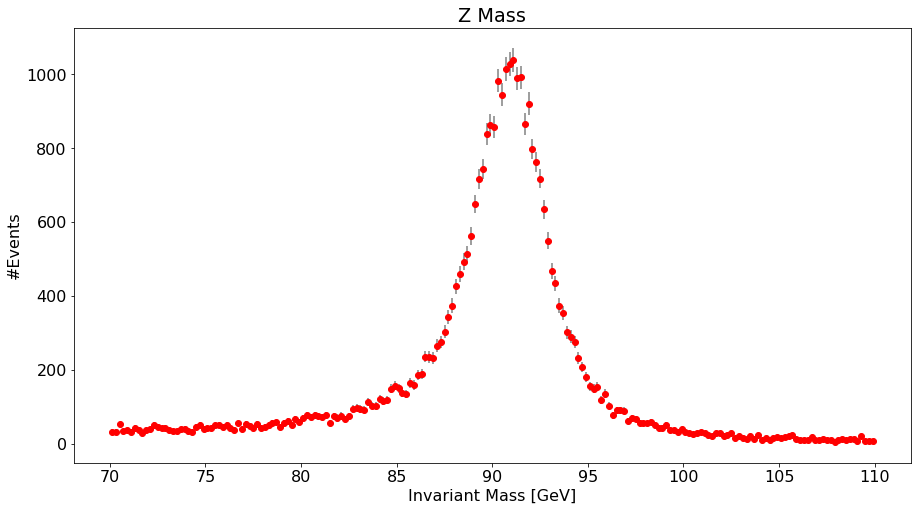

In [15]:
plot_hist(df['invariant_mass'], 200, 'Z Mass', 'Invariant Mass [GeV]', '#Events')

# Z Boson Decay Paramerters

In [55]:
space = {
    'a':hp.uniform('a', -2, 2),
    'b':hp.uniform('b', -2, 2), 
    'gamma':hp.uniform('gamma', 1, 5 ),
    'M':hp.uniform('M',90, 91.5),
    'A':hp.uniform('A', 1000, 7000),
}
sample_params = stochastic.sample(space)
sample_params

{'A': 1970.2919854644224,
 'M': 90.09715203840953,
 'a': -1.4879733927576986,
 'b': -0.6520483754404629,
 'gamma': 2.7344986866827976}

In [56]:
opt_algo = tpe.suggest
trials = Trials()
res = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 2000, trials=trials)

100%|██████████| 2000/2000 [00:59<00:00, 33.51it/s, best loss: 502.8826914546135]


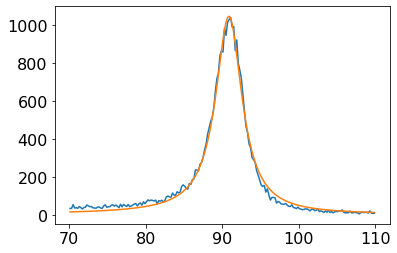

In [57]:
y, X = compute_histogram(df.invariant_mass, bins_num=200)
y_hat = breit_winger_dist(res, X)
plt.plot(X, y)
plt.plot(X, y_hat)
plt.show()

In [58]:
print('Parameters that fits Breit-Wigner distribution:')
res

Parameters that fits Breit-Wigner distribution:


{'A': 6872.848893350075,
 'M': 90.87452210162672,
 'a': 0.0128386056989295,
 'b': 0.13047266836521706,
 'gamma': 4.192305796738674}